<a href="https://colab.research.google.com/github/q190701/q190701/blob/main/audio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Kết nối với google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Khai báo thư viện

In [ ]:
import os
import pathlib

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import tensorflow as tf

from tensorflow.keras import layers
from tensorflow.keras import models
from IPython import display
import pandas as pd
from glob import glob 
import librosa as lr

import pandas as pd

##
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

Tạo hàm chuyển đổi dữ liệu dạng wav sang quang phổ spectrogram

In [ ]:
import soundfile as sf



def get_wav_info(wav_file):
    data, rate = sf.read(wav_file)
    return data, rate


def graph_spectrogram(wav_file):
    data, rate = get_wav_info(wav_file)
    nfft = 200 
    fs = 8000 
    noverlap = 120 
    nchannels = data.ndim
    if nchannels == 1:
        pxx, freqs, bins, im = plt.specgram(data, nfft, fs, noverlap = noverlap)
    elif nchannels == 2:
        pxx, freqs, bins, im = plt.specgram(data[:,0], nfft, fs, noverlap = noverlap)
    return pxx

Kiểm tra số lượng các file

In [ ]:
from glob import glob
data_dir= '/content/drive/MyDrive/projectAI/test/cat'
audio_files= glob(data_dir + '/*.png')
len(audio_files)

164

Vòng lặp chuyển đổi file

In [ ]:
import glob
import IPython.display as ipd
import librosa
for filename in glob.glob("../content/drive/MyDrive/convert/animalsounds/rooster/*.wav"):
  #dem=0
  dem=dem+1
  ipd.display(ipd.Audio(filename))
  # load the mp3 file
  signal, sr = librosa.load(filename, duration=10)  # sr = sampling rate

  get_wav_info(filename)
  graph_spectrogram(filename)
  #y=graph_spectrogram(filename)
  plt.savefig('../content/drive/MyDrive/convert/train/rooster/%04d.png'%(dem), bbox_inches='tight')
  plt.show()

Tạo các đường dẫn và bắt đầu dạy máy học

In [ ]:
test_path= '/content/drive/MyDrive/projectAI/test'
train_path= '/content/drive/MyDrive/projectAI/train'

In [ ]:
train_data = ImageDataGenerator(rescale = 1./255,
                                   shear_range=0.3,
                                   horizontal_flip=True,
                                   vertical_flip=False,
                                   zoom_range=0.3)
test_data = ImageDataGenerator(rescale = 1./255)
######
train_generator=train_data.flow_from_directory(train_path,
                                                  target_size=(252,381),
                                                  batch_size=32,
                                                  color_mode='rgb',
                                                  class_mode='categorical')
test_generator=test_data.flow_from_directory(test_path,
                                                  target_size=(252,381),
                                                  batch_size=32,
                                                  color_mode='rgb',
                                                  class_mode='categorical')

Found 924 images belonging to 10 classes.
Found 924 images belonging to 10 classes.


Tạo model

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=(252,381,3)))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
#model.compile(optimizers.rmsprop(lr=0.0005, decay=1e-6),loss="categorical_crossentropy",metrics=["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 252, 381, 32)      896       
                                                                 
 activation (Activation)     (None, 252, 381, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 250, 379, 64)      18496     
                                                                 
 activation_1 (Activation)   (None, 250, 379, 64)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 125, 189, 64)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 125, 189, 64)      0         
                                                        

Train model

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='SGD',metrics = 'accuracy')

In [ ]:
history=model.fit(train_generator,
                  steps_per_epoch= 20,
                  epochs=200,
                  batch_size=128,
                  validation_data= test_generator,
                  validation_steps=50)

Epoch 1/200
20/20 [==============================] - 327s 16s/step - loss: 2.2460 - accuracy: 0.1871 - val_loss: 2.2630 - val_accuracy: 0.1775
Epoch 2/200
20/20 [==============================] - 39s 2s/step - loss: 2.2416 - accuracy: 0.1698
Epoch 3/200
20/20 [==============================] - 22s 1s/step - loss: 2.2166 - accuracy: 0.1781
Epoch 4/200
20/20 [==============================] - 21s 1s/step - loss: 2.2263 - accuracy: 0.1719
Epoch 5/200
20/20 [==============================] - 18s 892ms/step - loss: 2.2340 - accuracy: 0.1797
Epoch 6/200
20/20 [==============================] - 18s 880ms/step - loss: 2.2268 - accuracy: 0.1651
Epoch 7/200
20/20 [==============================] - 18s 872ms/step - loss: 2.2336 - accuracy: 0.1813
Epoch 8/200
20/20 [==============================] - 18s 886ms/step - loss: 2.1977 - accuracy: 0.1840
Epoch 9/200
20/20 [==============================] - 17s 861ms/step - loss: 2.1912 - accuracy: 0.1965
Epoch 10/200
20/20 [==============================

In [ ]:
from keras.models import load_model
model.save('/content/drive/MyDrive/projectAI/audio_model')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/projectAI/audio_model/assets


Kết quả

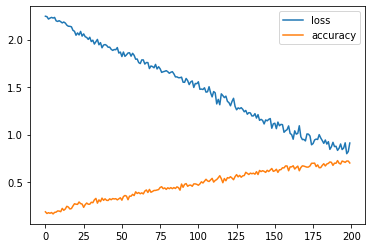

In [ ]:
metrics = history.history
plt.plot(history.epoch, metrics['loss'], metrics['accuracy'])
plt.legend(['loss', 'accuracy'])
plt.show()